In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [4]:
df.shape

(4177, 9)

In [5]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [7]:
 df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [12]:
df.tail(10)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4167   M   0.500     0.380   0.125        0.5770          0.2690   
4168   F   0.515     0.400   0.125        0.6150          0.2865   
4169   M   0.520     0.385   0.165        0.7910          0.3750   
4170   M   0.550     0.430   0.130        0.8395          0.3155   
4171   M   0.560     0.430   0.155        0.8675          0.4000   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
4167          0.1265        0.1535      9  
4168          0.1230        0.1765      8  
4169          0.1800        0.1815     10  
4170          0.1955        0.2405     10  
4171          0.1720        0.2290      8  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12

# Data Preprocessing (Analysis(EDA))

In [17]:
#Filter categorical Features

col_n=df.columns
col_n



Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [19]:
Col_m=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']

In [20]:
from sklearn.preprocessing import LabelEncoder

for g in Col_m:
    lala=LabelEncoder()
    df[g]=lala.fit_transform(df[g])

In [21]:
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2      66        56      18           715             417   
1       2      45        36      17           285             178   
2       0      81        67      26           962             480   
3       2      63        56      24           718             400   
4       1      41        34      15           253             159   
...   ...     ...       ...     ...           ...             ...   
4172    0      88        73      32          1289             698   
4173    2      93        71      26          1411             832   
4174    2      95        78      40          1727             994   
4175    0     100        80      29          1610            1005   
4176    2     117        94      38          2348            1461   

      Viscera weight  Shell weight  Rings  
0                199           263     14  
1                 94           113      6  
2                280           374      8  
3                225           273      9  
4                 76            87      6  
...              ...           ...    ...  
4172             475           442     10  
4173             426           463      9  
4174             571           550      8  
4175             518           530      9  
4176             732           813     11  

[4177 rows x 9 columns]

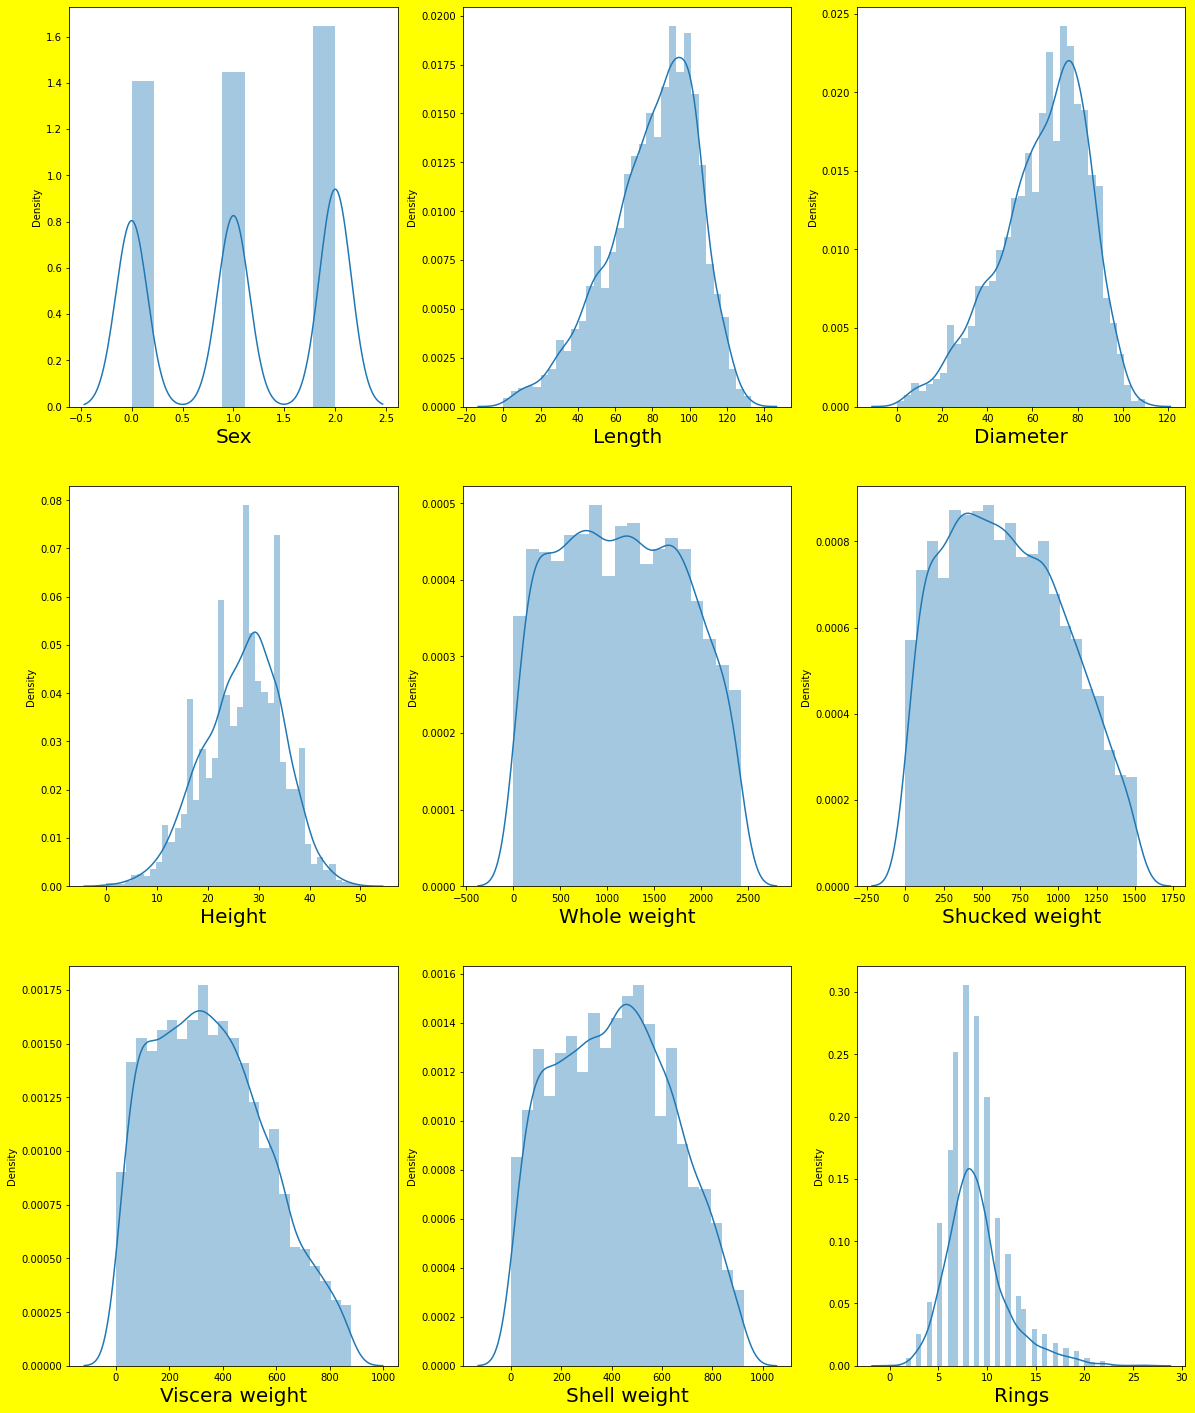

In [22]:
plt.figure(figsize= (20,25), facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber<=9 : #  there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize =20)
    plotnumber+= 1
plt.show()

In [25]:
# Create the fig, ax
fig, ax = plt.subplots()

# Create bar plot of first 1000 data entries 
ax.bar(df["Sex"], df["Rings"], color="blue")

#Add legend: x is horizonatal axis, y is vertical
ax.set(title="Sex and Nr. of Rings", 
       xlabel="Sex",
       ylabel="Number of rings");

Females have a slight tendency to live longer

In [26]:
import scipy.stats

In [28]:
col_names=df.columns
col_names

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [29]:
Col_names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']


In [31]:
scipy.stats.skew(df[Col_names])

array([-0.0981199 , -0.63617058, -0.60778099, -0.25505038,  0.07727683,
        0.23613999,  0.36429776,  0.13559083,  1.10795445])

In [33]:
df.corr()

Sex    Length  Diameter    Height  Whole weight  \
Sex             1.000000 -0.036006 -0.038846 -0.040559     -0.026480   
Length         -0.036006  1.000000  0.986815  0.898495      0.945616   
Diameter       -0.038846  0.986815  1.000000  0.904767      0.946053   
Height         -0.040559  0.898495  0.904767  1.000000      0.900422   
Whole weight   -0.026480  0.945616  0.946053  0.900422      1.000000   
Shucked weight -0.009979  0.923686  0.919422  0.855481      0.973950   
Viscera weight -0.035252  0.914853  0.911692  0.874504      0.966996   
Shell weight   -0.035159  0.925637  0.932714  0.906738      0.966973   
Rings          -0.034546  0.556666  0.574718  0.608239      0.554945   

                Shucked weight  Viscera weight  Shell weight     Rings  
Sex                  -0.009979       -0.035252     -0.035159 -0.034546  
Length                0.923686        0.914853      0.925637  0.556666  
Diameter              0.919422        0.911692      0.932714  0.574718  
Height                0.855481        0.874504      0.906738  0.608239  
Whole weight          0.973950        0.966996      0.966973  0.554945  
Shucked weight        1.000000        0.940029      0.909816  0.442772  
Viscera weight        0.940029        1.000000      0.926469  0.513213  
Shell weight          0.909816        0.926469      1.000000  0.630742  
Rings                 0.442772        0.513213      0.630742  1.000000

In [34]:
import seaborn as sns
sns.set()

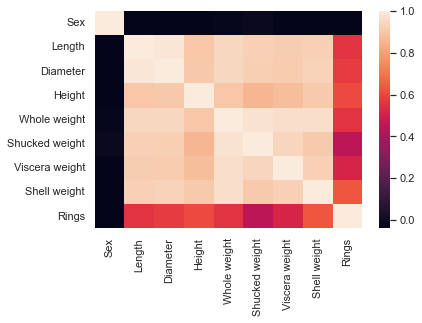

In [36]:
sns.heatmap(df.corr())
plt.show()

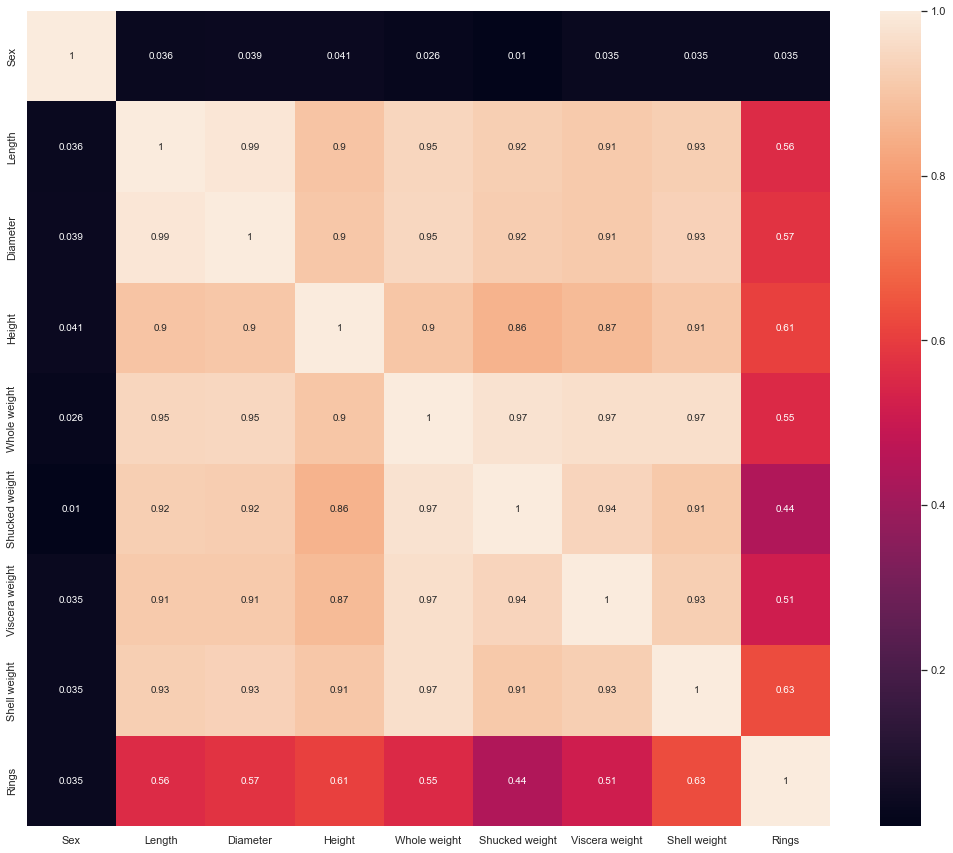

In [38]:
# Let us now check the correlation by plotting heatmap

df_corr = df.corr().abs() #Get the coefficient of one variable vs all other variables

plt.figure(figsize = (18,15))
sns.heatmap(df_corr, annot =True, annot_kws={'size' :10})
plt.show()

featurs seems to be highly correlated

In [39]:
# Let us find out which feature has high correlation(>0.7)

for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

Diameter
Height
Height
Whole weight
Whole weight
Whole weight
Shucked weight
Shucked weight
Shucked weight
Shucked weight
Viscera weight
Viscera weight
Viscera weight
Viscera weight
Viscera weight
Shell weight
Shell weight
Shell weight
Shell weight
Shell weight
Shell weight


# Checking Multi colinearity using VIF (Variance Inflation Factor)

In [41]:
x = df.drop(columns=['Rings'])
y = df['Rings']

scalar = StandardScaler()
x_scaled =scalar.fit_transform(x)

In [42]:
x_scaled.shape

(4177, 8)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif  = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]
vif["Features"]= x.columns
vif

vif        Features
0    1.008793             Sex
1   41.366543          Length
2   43.402586        Diameter
3    6.745035          Height
4  104.631709    Whole weight
5   29.346172  Shucked weight
6   16.139208  Viscera weight
7   25.271084    Shell weight

In [44]:
# Shucked weight has the least correlation with the target variable, so let us drop it first

x = df.drop(columns=['Rings','Shucked weight'])
y = df['Rings']

scalar = StandardScaler()
x_scaled =scalar.fit_transform(x)

In [45]:
x_scaled.shape

(4177, 7)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif  = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]
vif["Features"]= x.columns
vif

vif        Features
0   1.005505             Sex
1  41.062989          Length
2  43.401962        Diameter
3   6.697631          Height
4  39.850048    Whole weight
5  15.901252  Viscera weight
6  18.037497    Shell weight

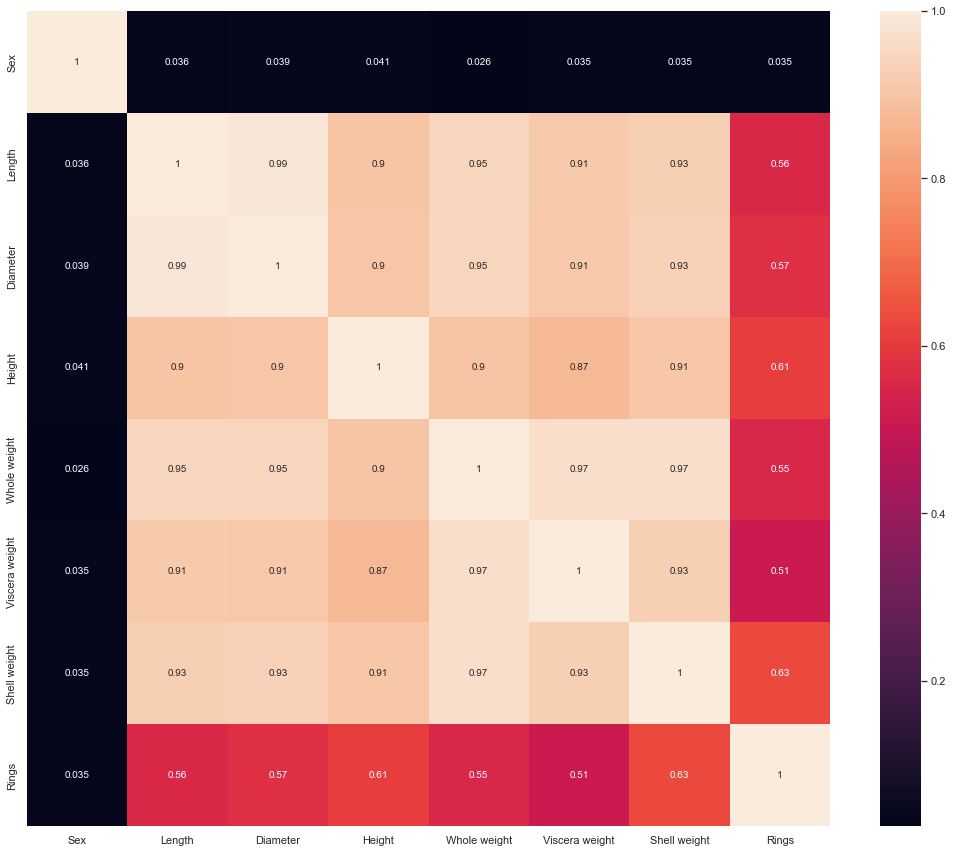

In [48]:
# Let us again check the correlation by plotting heatmap
df=df.drop(columns=['Shucked weight'])
df_corr = df.corr().abs() #Get the coefficient of one variable vs all other variables

plt.figure(figsize = (18,15))
sns.heatmap(df_corr, annot =True, annot_kws={'size' :10})
plt.show()

In [ ]:
# Viscera weight has the least correlation with the target variable, so let us drop it first
x = df.drop(columns=['Rings','Viscera weight'])
y = df['Rings']

scalar = StandardScaler()
x_scaled =scalar.fit_transform(x)

In [51]:
x_scaled.shape

(4177, 6)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif  = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]
vif["Features"]= x.columns
vif

vif      Features
0   1.003678           Sex
1  40.899506        Length
2  43.158956      Diameter
3   6.646229        Height
4  21.284743  Whole weight
5  17.685165  Shell weight

# Let us now build tthe model
s



In [54]:
# Since no. of feature is not large let us not remove more features
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state =41)

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf = RandomForestRegressor()

In [57]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
rf.score(x_train,y_train)

0.9277977098581175

In [61]:
y_pred = rf.predict(x_test)

In [65]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.4702165372761722

# # Let's tune the parameters using GridSearchCV

In [95]:
params = {"n_estimators":[20, 100],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,param_grid = params,cv=5,n_jobs=-1) # Use all the cores in your system to improve performance

In [98]:
grid_search.fit(x_train,y_train)

KeyError: False

In [99]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 20}


In [100]:
rf = RandomForestRegressor('max_depth'== 10, 'min_samples_leaf'== 5, 'min_samples_split'== 10, 'n_estimators'==20)

In [101]:
rf.fit(x_train,y_train)

ValueError: n_estimators must be greater than zero, got False.

In [103]:
# Importing evaluation metrics

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

# create an evaluation function
def metric_score(model):
    train_preds= model.predict(x_train)
    test_preds = model.predict(x_test)
    scores = {"Train MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Train MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Train RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Train R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
    return scores

In [106]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
metric_score(rf)

{'Train MAE': 0.5969636015325671,
 'Test MAE': 1.7098373205741626,
 'Train MSE': 0.005878833051193094,
 'Test MSE': 0.04649026160901411,
 'Train RMSE': 0.07667354857571869,
 'Test RMSE': 0.2156160049927048,
 'Train R2': 0.927239775023526,
 'Test R2': 0.4699878987498618}

In [ ]:
# Seems like model is overfitting the train data

# Let's plot ROC-AUC curve to choose the best model

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [108]:
lr = LogisticRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
kn = KNeighborsRegressor()
et = ExtraTreesRegressor

In [111]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
#et.fit(x_train,y_train)

KNeighborsRegressor()

In [112]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)

0.4029032635803961

In [114]:
disp = plot_roc_curve(dt, x_train, y_train)

plot_roc_curve(lr, x_train, y_train, ax=disp.ax_)

plot_roc_curve(kn, x_train, y_train, ax=disp.ax_)

plot_roc_curve(rf, x_train, y_train, ax=disp.ax_)

plt.legend(prop= {'size':10}, loc='lower right')

plt.show()

ValueError: DecisionTreeRegressor should be a binary classifier